<a href="https://colab.research.google.com/github/SangminAhn21/DL_Study/blob/main/Python_DeepLearning_PyTorch/PART_04/Transfer_Learning(ant%26bee).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.9.0+cu111  Device: cuda


In [5]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

image_datasets = {x: datasets.ImageFolder("drive/MyDrive/Colab Notebooks/hymenoptera_data",
    data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
    batch_size = BATCH_SIZE,
    num_workers = 0,
    shuffle = True) for x in ['train', 'val']}

In [7]:
for (X_train, y_train) in dataloaders['train']:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

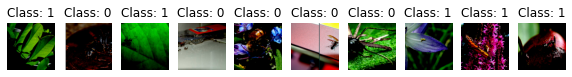

In [8]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [9]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
                Epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [10]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [11]:
import torchvision.models as models
model = models.resnet18(pretrained = False).cuda()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
for Epoch in range(1, EPOCHS + 1):
    train(model, dataloaders['train'], optimizer, log_interval = 5)
    test_loss, test_accuracy = evaluate(model, dataloaders['val'])
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/397(0%)]	Train Loss: 0.652080
Train Epoch: 1 [160/397(38%)]	Train Loss: 0.608698
Train Epoch: 1 [320/397(77%)]	Train Loss: 0.885929

[EPOCH: 1], 	Test Loss: 0.0240, 	Test Accuracy: 39.29 % 

Train Epoch: 2 [0/397(0%)]	Train Loss: 0.722217
Train Epoch: 2 [160/397(38%)]	Train Loss: 0.591781
Train Epoch: 2 [320/397(77%)]	Train Loss: 0.636248

[EPOCH: 2], 	Test Loss: 0.0229, 	Test Accuracy: 55.42 % 

Train Epoch: 3 [0/397(0%)]	Train Loss: 0.665246
Train Epoch: 3 [160/397(38%)]	Train Loss: 0.672012
Train Epoch: 3 [320/397(77%)]	Train Loss: 0.689187

[EPOCH: 3], 	Test Loss: 0.0220, 	Test Accuracy: 57.68 % 

Train Epoch: 4 [0/397(0%)]	Train Loss: 0.707214
Train Epoch: 4 [160/397(38%)]	Train Loss: 0.589075
Train Epoch: 4 [320/397(77%)]	Train Loss: 0.726788

[EPOCH: 4], 	Test Loss: 0.0245, 	Test Accuracy: 62.47 % 

Train Epoch: 5 [0/397(0%)]	Train Loss: 0.592310
Train Epoch: 5 [160/397(38%)]	Train Loss: 0.754711
Train Epoch: 5 [320/397(77%)]	Train Loss: 0.693905

[EPOCH: 5], 	

In [14]:
import torchvision.models as models
model = models.resnet18(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
EPOCHS = 10
for Epoch in range(1, EPOCHS + 1):
    train(model, dataloaders['train'], optimizer, log_interval = 5)
    test_loss, test_accuracy = evaluate(model, dataloaders['val'])
    print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n'.
          format(Epoch, test_loss, test_accuracy))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Train Epoch: 1 [0/397(0%)]	Train Loss: 0.809991
Train Epoch: 1 [160/397(38%)]	Train Loss: 0.624392
Train Epoch: 1 [320/397(77%)]	Train Loss: 0.704022

[EPOCH: 1], 	Test Loss: 0.0224, 	Test Accuracy: 64.48 % 

Train Epoch: 2 [0/397(0%)]	Train Loss: 0.542630
Train Epoch: 2 [160/397(38%)]	Train Loss: 0.582839
Train Epoch: 2 [320/397(77%)]	Train Loss: 0.626155

[EPOCH: 2], 	Test Loss: 0.0172, 	Test Accuracy: 77.33 % 

Train Epoch: 3 [0/397(0%)]	Train Loss: 0.483685
Train Epoch: 3 [160/397(38%)]	Train Loss: 0.532670
Train Epoch: 3 [320/397(77%)]	Train Loss: 0.528118

[EPOCH: 3], 	Test Loss: 0.0147, 	Test Accuracy: 79.85 % 

Train Epoch: 4 [0/397(0%)]	Train Loss: 0.453507
Train Epoch: 4 [160/397(38%)]	Train Loss: 0.407471
Train Epoch: 4 [320/397(77%)]	Train Loss: 0.468508

[EPOCH: 4], 	Test Loss: 0.0133, 	Test Accuracy: 80.10 % 

Train Epoch: 5 [0/397(0%)]	Train Loss: 0.362822
Train Epoch: 5 [160/397(38%)]	Train Loss: 0.319102
Train Epoch: 5 [320/397(77%)]	Train Loss: 0.401733

[EPOCH: 5], 	